In [28]:
#Criar variavel com a georeferência da area a ser estudada(instalar geopandas,)

#import dos dados
#transformar dados
#selecionar dados a serem estudados
# analise exploratória
#plotar dados
#salvar e disponibilizar dados 


In [29]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Locale: Utilizado para formatação de datas, valores, dias de acordo com a região que queremos.
import locale 
#Warnings: Possui detalhes sobre os avisos e alertas que aparecem, porém podemos utiliza-lo também para que os alertas de
#futuras atualizações e metodos depreciados não sejam exibidos
import warnings
warnings.filterwarnings("ignore")
#comando utilizado para exibir todas as colunas
pd.set_option('display.max_columns',None)

Gerando dados geoespaciais para criarmos o mapa:
#dados importados do site do IBGE: https://www.ibge.gov.br/geocienciasorganizacao-do-territorio/malhas-territoriais/15774-malhas.html?=&t=acesso-ao-produto

In [34]:
#importando arquivo contendo georeferencia
dados_municipios=gpd.read_file("SP_Municipios_2021/")
dados_municipios.head()


,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."


In [37]:
#type(dados_municipios)


<AxesSubplot:>

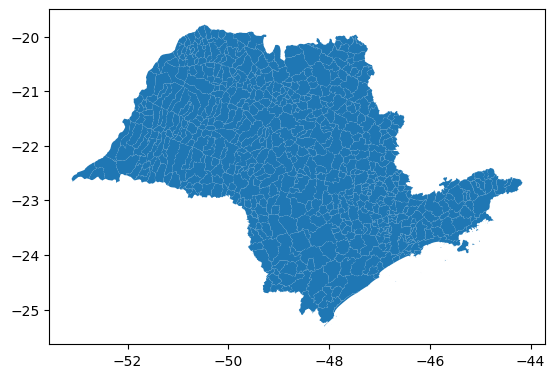

In [36]:
#aqui estamoos visualizando os dados contidos geografico do Estado de SP separado por municipio
dados_municipios.plot()

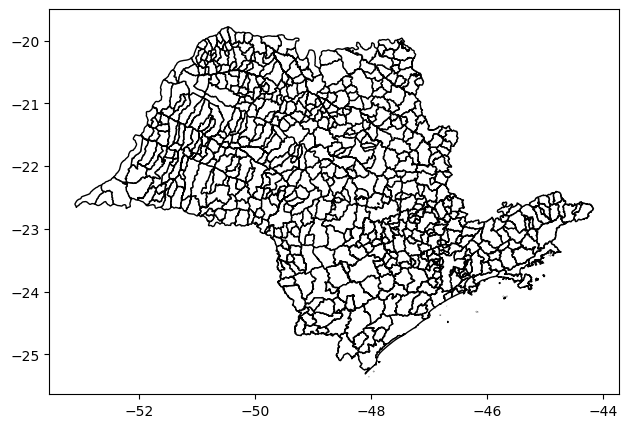

In [46]:
# aqui temos uam melhor visualização dos dados
gdf_municipios_sp=dados_municipios.plot(figsize=(10,5),facecolor='white',edgecolor='black')
plt.show()

In [ ]:
#Aqui vamos salvar o mapa que cria
dados_municipios.to_file('dadosmunicipios.json',driver='GeoJSON')

Agora vamos importar e analisar os dados

In [51]:
# Criando variavel principal
dados_rvriculos=pd.read_csv('DadosBO_2022_10_roubo_de_veiculos_sp.csv',encoding='ISO-8859-1', sep = ';')

In [52]:
dados_rvriculos.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2022,1710084,1710084/2022,01/10/2022 00:03,01/10/2022 00:03,30/09/2022,20:30,A NOITE,30/09/2022,01/10/2022 00:03,Desconhecida,Não,NaN,RUA JORGE NEWBERY,92,JACANA,S.PAULO,SP,"-23,48104899","-46,5660764",Garagem ou abrigo de residência,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,73º D.P. JACANA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUX4246,SP,S.PAULO,Prata,HONDA/CITY DX FLEX,2011.0,NaN,AUTOMOVEL,NaN,NaN
1,2022,1710085,1710085/2022,01/10/2022 00:08,01/10/2022 00:08,30/09/2022,18:00,A NOITE,30/09/2022,01/10/2022 00:08,Desconhecida,Não,NaN,RUA PARATINGA,81,CONCEICAO,DIADEMA,SP,"-23,70204035","-46,6204273",Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,01º D.P. DIADEMA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DXF9J96,SP,DIADEMA,Vermelho,I/TOYOTA COROLLA,2022.0,NaN,AUTOMOVEL,NaN,NaN
2,2022,2381,2381/2022,01/10/2022 00:17,01/10/2022 00:17,30/09/2022,23:30,A NOITE,30/09/2022,01/10/2022 00:17,Desconhecida,Não,NaN,RUA JOSE RAFAELLI,272,SOCORRO,S.PAULO,SP,"-23,66683992","-46,7226596",Via pública,NaN,BO PARA INVESTIGAÇÃO,102º D.P. SOCORRO,102º D.P. SOCORRO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FNW7B16,SP,S.PAULO,Branco,HONDA/ADV 150,2021.0,2022.0,MOTONETA,NaN,NaN
3,2022,7423,7423/2022,01/10/2022 00:20,01/10/2022 00:20,30/09/2022,20:00,A NOITE,30/09/2022,01/10/2022 00:20,Conhecida,Sim,NaN,Avenida Senador Lacerda Franco,970,Jardim do Lago,CAMPINAS,SP,"-22,936142","-47,0888835",Via pública,NaN,BO PARA FLAGRANTE,PLANTÃO - 01 DP CAMPINAS,02º D.P. CAMPINAS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBT1A77,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,NaN,NaN
4,2022,1710093,1710093/2022,01/10/2022 00:28,01/10/2022 00:28,30/09/2022,20:00,A NOITE,30/09/2022,01/10/2022 00:28,Desconhecida,Não,NaN,Avenida Carlos Caldeira Filho,31,Vila Prel,S.PAULO,SP,"-23,6459599","-46,7537041",Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,37º D.P. CAMPO LIMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEA7G37,SP,S.PAULO,Azul,YAMAHA/FZ25 FAZER,2022.0,NaN,MOTOCICLO,NaN,NaN
